In [74]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm, rcParams
%matplotlib inline
from sklearn.datasets import make_circles, make_swiss_roll
from sklearn.metrics import pairwise_distances
scatter_params = {'s': 15, 'alpha': .7}
plt.style.use('seaborn')

In [6]:
num_of_samples = 2000

In [7]:
X_1_mean = np.array([0., 0.])
X_1_cov = np.array([[3., -1.5], [-1.5, 3.]])
X_1 = np.random.multivariate_normal(mean=X_1_mean, cov=X_1_cov, size=num_of_samples)
y_1 = [0] * len(X_1)

In [8]:
X_2_mean_1 = np.array([0., 0.])
X_2_cov_1 = np.array([[5., 3.], [3., 5.]])
X_2_mean_2 = np.array([10., 0.])
X_2_cov_2 = np.array([[3., -1.5], [-1.5, 10.]])
X_2_mean_3 = np.array([20., 40.])
X_2_cov_3 = np.array([[3., -1.5], [-1.5, 3.]])
X_2 = np.r_[
    np.random.multivariate_normal(mean=X_2_mean_1, cov=X_2_cov_1, size=num_of_samples),
    np.random.multivariate_normal(mean=X_2_mean_2, cov=X_2_cov_2, size=num_of_samples),
    np.random.multivariate_normal(mean=X_2_mean_3, cov=X_2_cov_3, size=num_of_samples)
]
y_2 = [0] * num_of_samples + [1] * num_of_samples + [2] * num_of_samples

In [9]:
X_3_mean_1 = np.array([0., 0., .0])
X_3_cov_1 = np.array([[5., 3., 1], [3., 5., 2], [1., 2., 5]])
X_3_mean_2 = np.array([10., 0., 0])
X_3_cov_2 = np.array([[3., -1.5, 1], [-1.5, 3., 1], [1, 1, 4]])
X_3_mean_3 = np.array([20., 40., 0])
X_3_cov_3 = np.array([[3., -1.5, 1], [-1.5, 3., 1], [1, 1, 4]])
X_3 = np.r_[
    np.random.multivariate_normal(mean=X_3_mean_1, cov=X_3_cov_1, size=num_of_samples),
    np.random.multivariate_normal(mean=X_3_mean_2, cov=X_3_cov_2, size=num_of_samples),
    np.random.multivariate_normal(mean=X_3_mean_3, cov=X_3_cov_3, size=num_of_samples)
]
y_3 = [0] * num_of_samples + [1] * num_of_samples + [2] * num_of_samples

In [55]:
X_circle, y_circle = make_circles(num_of_samples, noise=0.1, factor=0.3)

In [60]:
X_rolls, y_rolls = make_swiss_roll(n_samples=num_of_samples, noise=0.1)

In [33]:
def plot_1d(X, y):
    cmap = cm.get_cmap("Spectral")
    colors = {0: "red", 1: "green", 2: 'blue', 3:'lightblue', 4:'yellow', 5:'pink', 6:'orange', 7:'purple', 8:'magenta'}
    plt.scatter(X[:, 0], [0]*len(X), c=[colors[i] for i in y], **scatter_params)
    plt.title(f'number of clusters: {len(np.unique(y))}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [11]:
def plot_2d(X, y):
    cmap = cm.get_cmap("Spectral")
    colors = {0: "red", 1: "green", 2: 'blue', 3:'lightblue', 4:'yellow', 5:'pink', 6:'orange', 7:'purple', 8:'magenta'}
    plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y], **scatter_params)
    plt.title(f'number of clusters: {len(np.unique(y))}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [12]:
def plot_3d(X, y):
    cmap = cm.get_cmap("Spectral")
    colors = {0: "red", 1: "green", 2: 'blue', 3:'lightblue', 4:'yellow', 5:'pink', 6:'orange', 7:'purple', 8:'magenta'}
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=[colors[i] for i in y], **scatter_params)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(f'number of clusters: {len(np.unique(y))}')
    plt.show()

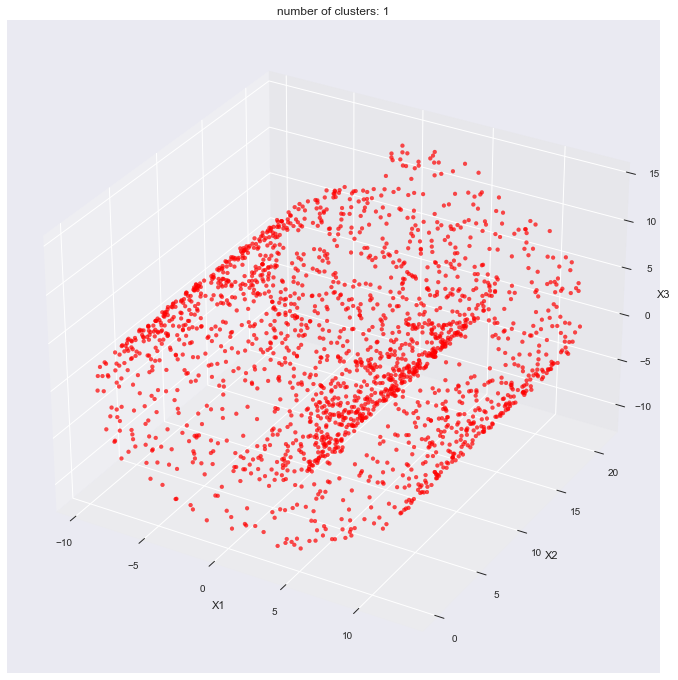

In [66]:
plot_3d(X_rolls, [0] * len(X_rolls))

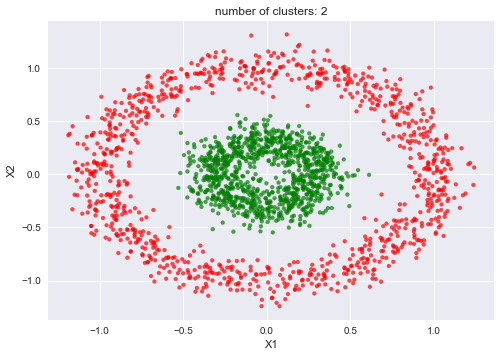

In [56]:
plot_2d(X_circle, y_circle)

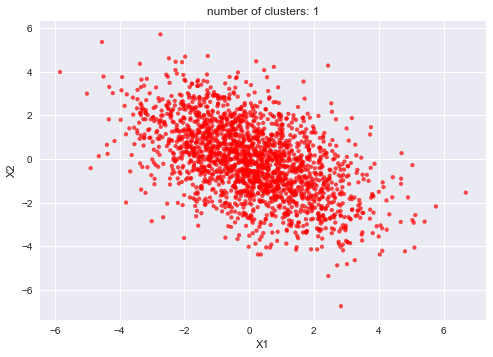

In [123]:
plot_2d(X_1, y_1)

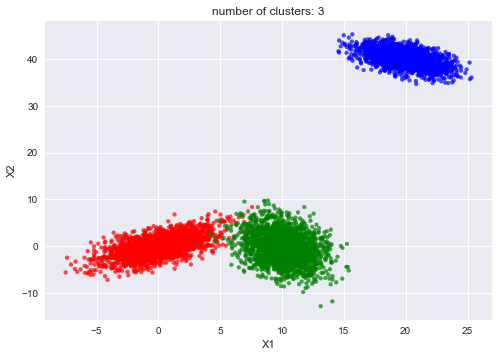

In [132]:
plot_2d(X_2, y_2)

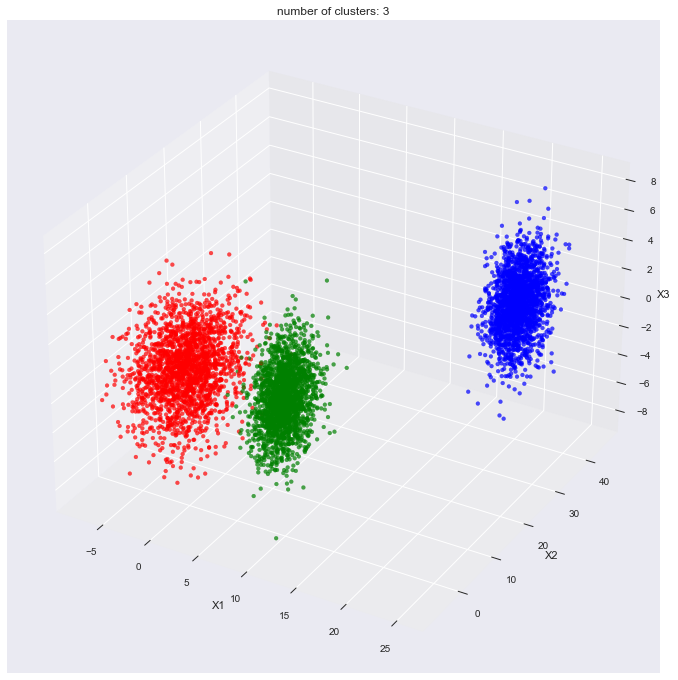

In [14]:
plot_3d(X_3, y_3)

In [68]:
def PCA(X, num_components):
    X_cen = X - X.mean(axis=0)
    X_cov = np.cov(X_cen, rowvar=False)
    U, S, V = np.linalg.svd(X_cov)
    return X_cen @ V[:num_components].T

In [71]:
X_circle_pca = PCA(X_circle, 1)

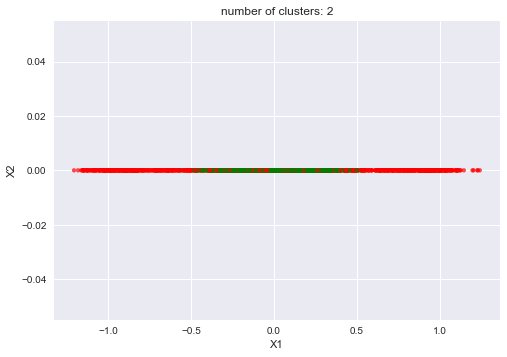

In [73]:
plot_1d(X_circle_pca, y_circle)

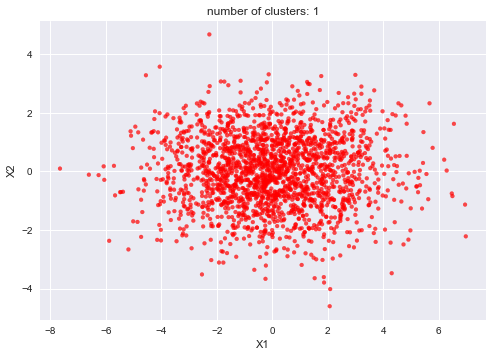

In [38]:
plot_2d(X_1_pca, y_1)

# MDS

In [83]:
X_1_distances = np.power(pairwise_distances(X_1), 2)

In [122]:
def MDS(D, n):
    N = len(D)
    I = np.diag(np.ones(N))
    ONE = np.ones((N, 1))
    C = I - 1/N * ONE @ ONE.T
    CDC = -1/2 * (C @ D @ C)
    U, S, V = np.linalg.svd(CDC)
    return (np.diag(np.sqrt(S)[:n]) @ V[:n]).T

In [123]:
X_circle_distances = np.power(pairwise_distances(X_circle), 2)

In [170]:
X_circle_mds = MDS(X_circle_distances, 1)

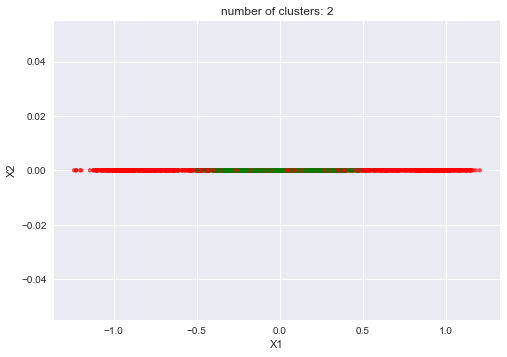

In [171]:
plot_1d(X_circle_mds, y_circle)

In [129]:
from sklearn.decomposition import KernelPCA

In [166]:
k_pca = KernelPCA(n_components=2, kernel='rbf', gamma=10)

In [167]:
X_circle_k_pca = k_pca.fit_transform(X_circle)

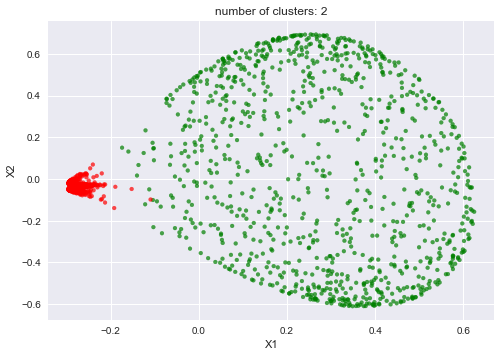

In [169]:
plot_2d(X_circle_k_pca, y_circle)